<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Multicapa/Clasificaci%C3%B3n_de_candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

## Redes Neuronales Multicapa (MLP)

### Predicción en la clasificación de candidatos

Este un modelo que clasifica a un candidato a un empleo de acuerdo a sus habilidades. Se utiliza un cojnuto de datos sintético.

#### Creación del dataset

""" Generar dataset sintético con diferentes rangos por habilidad """

In [1]:
import numpy as np
import pandas as pd

In [2]:
"""
Generar el dataset
"""
# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [3]:
"""
Mostrar el dataset
"""
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,91,85,73,82,90,82,77,87,70,67,83,89,62,85,52,52,67,57
1,84,97,89,70,91,87,82,74,68,87,68,90,76,60,66,50,69,60
2,88,90,77,84,85,81,90,87,66,75,62,84,75,71,67,80,76,83
3,80,97,82,100,98,81,61,77,88,74,85,71,64,66,61,75,79,84
4,75,74,81,71,90,74,76,71,90,82,73,82,79,79,58,65,53,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70,89,77,79,72,72,77,72,70,83,85,66,79,81,57,81,80,53
4996,74,74,75,97,96,80,81,67,88,82,86,78,70,74,80,62,80,61
4997,95,70,100,88,87,85,72,83,66,64,68,74,56,70,56,68,77,65
4998,77,83,79,89,91,90,85,64,88,85,70,71,70,64,70,65,70,63


""" Etiqueta y """

In [4]:
"""
Generar la etiqueta y
"""
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [5]:
y
"""
 Muestra el vector de clases obtenido, donde:
True= Apto
False=No Apto
"""

'\n Muestra el vector de clases obtenido, donde:\nTrue= Apto\nFalse=No Apto\n'


#### Conjunto de entrenamiento y prueba

""" Obtenemos los conjuntos de entrenamiento y de test """

In [6]:
"""
Conjunto de entrenamiento y de test
"""
#Separa en Train y Tets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Red Nauronal Multicapa

In [7]:
"""
Definición del modelo
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), #Capas ocultas
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax') #Capa de salida
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Entrenamiento

In [8]:
"""
Entrenamiento del modelo
"""
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1,
    validation_data=(X_test, y_test), #Conjunto de validación
    verbose=1 #Para imprimir los datos
)


"""
accuracy y loss pertenecen al conjunto train
val_accuracy y val_loss pertenecen al conjunto test
"""

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8581 - loss: 0.2952 - val_accuracy: 0.9720 - val_loss: 0.0727
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9694 - loss: 0.0698 - val_accuracy: 0.9740 - val_loss: 0.0679
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9817 - loss: 0.0472 - val_accuracy: 0.9640 - val_loss: 0.0935
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9820 - loss: 0.0411 - val_accuracy: 0.9720 - val_loss: 0.0772
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9853 - loss: 0.0346 - val_accuracy: 0.9750 - val_loss: 0.0554
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.9750 - val_loss: 0.0571
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9880 - loss: 0.0254 - val_accuracy: 0.9580 - val_loss: 0.1077
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9923 - loss: 0

'\naccuracy y loss pertenecen al conjunto train\nval_accuracy y val_loss pertenecen al conjunto test\n'

#### Evaluación y metricas del modelo

""" Función de perdida """

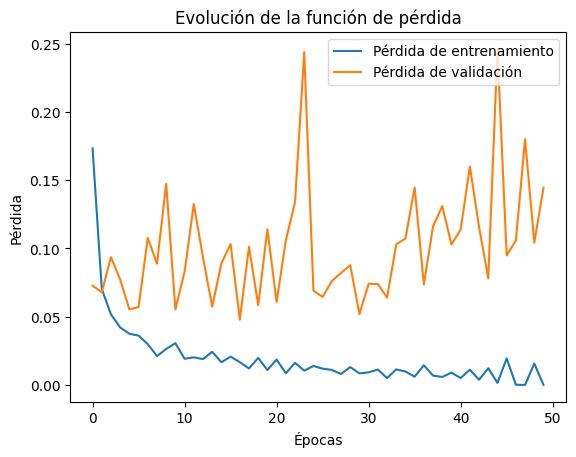

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9841 - loss: 0.1179

🔹 Loss: 0.1444  |  Accuracy: 0.9800


In [9]:
"""
Evaluación del modelo, grafica de la función de pérdida
"""
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

""" Matriz de confusión """

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


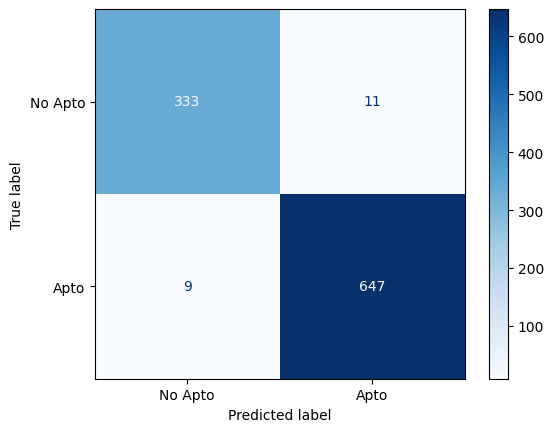


Sensitivity (Recall) por clase:
No Apto: 0.97
Apto: 0.99


In [10]:
"""
Matriz de confusión y sensibilidad
"""
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

""" Evaluar un candidato nuevo """

In [11]:
"""
Evaluar nuevo candidato con el modelo
"""
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Evaluación de nuevo candidato:
Resultado: Apto
